In [2]:
from scripts.fe import FeatureEngineering

df = FeatureEngineering()
df.head()

,building_id_x,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id_y,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,201944,3


In [3]:
import pandas as pd

for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            df[column] = pd.factorize(df[column])[0]
df.head()


,building_id_x,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id_y,damage_grade
0,802906,6,487,12198,2,30,6,5,0,0,...,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,1,0,...,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,0,0,...,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,0,0,...,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,0,0,...,0,0,0,0,0,0,0,0,201944,3


In [4]:
X = df.drop('damage_grade', axis=1)
X = X.drop('building_id_y', axis=1)
y = df['damage_grade']


In [5]:
X.rename(columns={'building_id_x': 'building_id'}, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier



def get_score(n_estimators, X_train, y_train):
  my_pipeline = Pipeline(steps=[
      #('preprocessor', SimpleImputer()),
      ('model', RandomForestClassifier(n_estimators, random_state=0))
  ])
  scores =  -1 * cross_val_score(my_pipeline, X_train, y_train,
                                 cv=3,
                                 scoring='neg_mean_absolute_error')

  return scores.mean()


def find_best_score(start, stop, increment, X_train, y_train):
  
    results = {}
    # this is GridSearchCV
    # we are looking for the optimal number of estimators
    # using 3-fold cross validation
    for i in range(start, stop, increment):
      results[i] = get_score(i, X_train, y_train)


    # Finding the key with the lowest value
    min_key = min(results, key=results.get)
    min_value = results[min_key]

    return min_key, min_value, results


def plot_results(results):

    # Creating the line plot
    plt.figure(figsize=(10, 6))
    plt.plot(results.keys(), results.values(), marker='o')
    plt.title('Line Plot of Results')
    plt.xlabel('Key')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()



In [8]:
min_key, min_value, results = find_best_score(2, 10, 1, X_train, y_train)

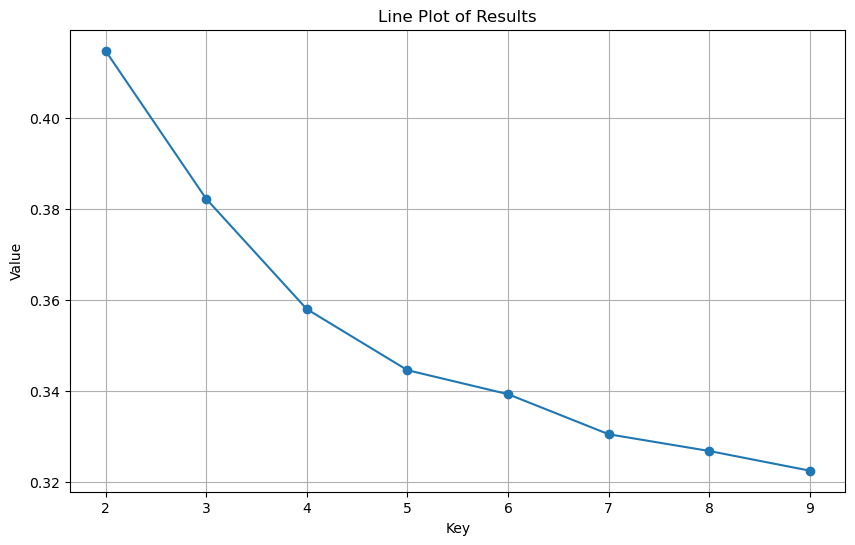

In [9]:
plot_results(results)

In [10]:
min_key

9

In [11]:
def tune_model(X_train, y_train, n_estimators, max_depth=5):

    '''Tunes the model according to CV data and returns the best model and its score'''
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)

    return model, model.score(X_train, y_train)



In [12]:
model, score = tune_model(X_train, y_train, min_key, 5)

In [13]:
score

0.5783137813836202

In [14]:
X_test = pd.read_csv('data/test_values.csv')
X_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [15]:
for column in X_test.columns:
        if X_test[column].dtype == 'object' or X_test[column].dtype.name == 'category':
            X_test[column] = pd.factorize(X_test[column])[0]

X_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,0,0,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,0,0,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
pred = model.predict(X_test)

In [17]:
pred

array([2, 2, 2, ..., 2, 2, 2])

In [18]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(pred, columns=['Prediction'])

# Export to CSV
predictions_df.to_csv('predictions.csv', index=False)